In [120]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models

In [121]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


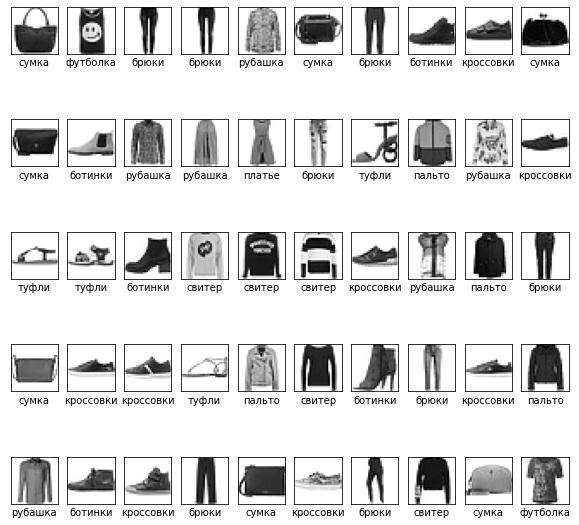

In [122]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [123]:
# Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))


Number of train data - 60000
Number of test data - 10000


In [124]:
# Преобразование размерности изображений
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Преобразуем из  (28, 28) в (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Преобразуем метки в категории
y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [125]:
model = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

In [126]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 7, 7, 32)        

In [127]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [128]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5934 - accuracy: 0.7815
Epoch 00001: val_loss improved from inf to 0.37143, saving model to model.weights.best.hdf5
860/860 [==============================] - 48s 55ms/step - loss: 0.5934 - accuracy: 0.7814 - val_loss: 0.3714 - val_accuracy: 0.8708
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8493
Epoch 00002: val_loss improved from 0.37143 to 0.32110, saving model to model.weights.best.hdf5
860/860 [==============================] - 49s 57ms/step - loss: 0.4113 - accuracy: 0.8493 - val_loss: 0.3211 - val_accuracy: 0.8836
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3693 - accuracy: 0.8659
Epoch 00003: val_loss improved from 0.32110 to 0.30137, saving model to model.weights.best.hdf5
860/860 [==============================] - 50s 58ms/step - loss: 0.3692 - accuracy: 0.8659 - val_loss: 0.3014 - val_accuracy: 0.8908
Epoch 4/10
859/860 [=========

In [129]:
model.load_weights('model.weights.best.hdf5')

In [133]:
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', round(score[1], 3))
# Вывод.Точность построенной нейросети выше, чем в предыдущем ДЗ


 Test accuracy: 0.908


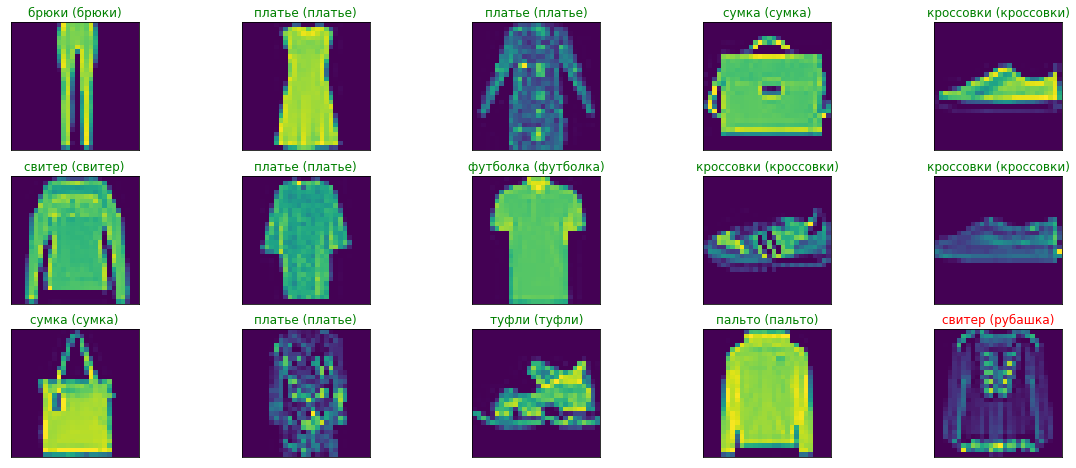

In [140]:
#визуализация
y_hat = model.predict(x_test)



figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
   
    ax.set_title("{} ({})".format(classes[predict_index], 
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))